In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
# api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'INTC'
# ticker = 'AAPL'


''' время '''
stime='1990-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

''' для фильтрации'''
filt_start_date = '2003'
filt_finish_date = '2022'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df.tail(3)

,INTC
Date,
2022-11-01 00:00:00-04:00,29.669285
2022-12-01 00:00:00-05:00,26.430000
2023-01-01 00:00:00-05:00,29.700001


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,INTC
Date_index,
1990-01-01,0.713743
1990-02-01,0.727295
1990-03-01,0.754400


In [7]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2021,FY,19.468835,4.894802,7.388766,2.380389,7,23.501109,15.067258,23.501109,9.533875,210824454317.400024,244098454317.400024,10.611257,2.667853,7.029591,21.81996,2.210108,2.210108,3.088915,7.159992,8.139057,25.263761,0.09424,0.04583,0.351291,0.433565,0.976006,2.101741,32.589615,1.509513,0.026771,0.284075,0.082798,0.19222,0.203277,-0.677837,-0.257251,-1.723965,0.025764,50.874832,0.138041,0.148077,-7.913587,30256000000,61158000000,-15297000000,0.399419,8119500000,5664000000,9601500000,43.680464,59.577239,111.71121,8.356138,6.126501,3.267353,0.20828,-5.008376
2020,FY,18.544177,4.977137,8.426768,4.984758,5.690641,19.299357,10.726602,19.299357,8.818766,232792554121.400024,263328554121.400024,11.138933,2.989618,6.579034,11.121903,2.872634,2.872634,3.381773,6.93956,7.442023,12.580792,0.089775,0.089913,0.418285,0.470655,0.804723,1.908742,37.643879,1.693095,0.023918,0.266424,0,0.174092,0.235135,-0.408461,-0.185611,-1.180897,0.02381,46.489245,0.184499,0.178481,-9.254108,22495000000,45041000000,-24804000000,0.449184,6782000000,5581000000,8427000000,31.790489,59.467669,89.792877,11.481421,6.137789,4.06491,0.257891,-3.44201
2019,FY,16.292733,4.765225,7.503962,3.833371,2.971021,17.546751,9.181798,17.546751,6.676477,290152740600.799988,314959740600.799988,13.785288,4.031859,8.754043,17.136354,3.743713,3.743713,4.376568,8.903959,9.502481,18.601449,0.072541,0.058355,0.326538,0.43117,0.701298,1.400224,45.06135,1.574734,0.019217,0.264918,0.085458,0.185674,0.271769,-0.489154,-0.22529,-1.497598,0.023692,43.374186,0.192927,0.211706,-8.065599,8929000000,40556000000,-27626000000,0.374187,7220500000,4854500000,8585500000,38.845758,50.518692,107.009556,9.396135,7.225048,3.41091,0.271573,-3.670591


In [8]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()
# index_years


In [9]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)

In [10]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr.drop('period', axis=1, inplace=True)

# df_key_metr.head(3)

financial_rations

In [11]:
df_fin_rat = fa.financial_ratios(ticker, api_key, period='annual')
df_fin_rat = df_fin_rat.T
df_fin_rat.head(3)

,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
2021,FY,2.101741,1.378996,0.17577,43.680464,111.71121,155.391674,59.577239,95.814436,0.554452,0.246204,0.274638,0.251417,0.084551,0.117977,0.20828,0.138041,0.915449,1.115491,0.246204,0.433565,0.765429,0.259967,0.285418,32.589615,0.787145,1.765429,8.356138,6.126501,3.267353,1.24949,0.469247,7.388766,2.380389,7,0.284075,0.379518,0.322163,0.787145,6.532564,-1.475282,-2.042288,0.284075,2.210108,2.210108,2.667853,10.611257,21.81996,7.029591,7.029591,-5.871562,2.667853,0.026771,7.159992,2.210108
2020,FY,1.908742,1.239274,0.236931,31.790489,89.792877,121.583366,59.467669,62.115697,0.560083,0.304083,0.322062,0.268394,0.16664,0.136514,0.257891,0.184499,0.83336,1.059127,0.304083,0.470655,0.889126,0.294923,0.309957,37.643879,0.972061,1.889126,11.481421,6.137789,4.06491,1.376131,0.508632,8.426768,4.984758,5.690641,0.266424,0.454416,0.591539,0.972061,14.13099,-2.448211,-3.982442,0.266424,2.872634,2.872634,2.989618,11.138933,11.121903,6.579034,6.579034,2.530129,2.989618,0.023918,6.93956,2.872634
2019,FY,1.400224,0.931511,0.187987,38.845758,107.009556,145.855314,50.518692,95.336622,0.585562,0.306191,0.334301,0.292476,0.125114,0.154171,0.271573,0.192927,0.874886,1.091808,0.306191,0.43117,0.759509,0.246158,0.272297,45.06135,1.142892,1.761509,9.396135,7.225048,3.41091,1.284768,0.527123,7.503962,3.833371,2.971021,0.264918,0.460571,0.510846,1.142892,8.975088,-2.044347,-3.11601,0.264918,3.743713,3.743713,4.031859,13.785288,17.136354,8.754043,8.754043,3.149938,4.031859,0.019217,8.903959,3.743713


In [12]:

df_fin_rat = df_fin_rat.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_fin_rat.index.to_list()
# index_years

In [13]:
df_fin_rat[ticker] = list(stock_year_prices)

# df_key_metr.head(3)

income_statement

In [14]:
df_inc_stat = fa.income_statement(ticker, api_key)
df_inc_stat = df_inc_stat.T
df_inc_stat.head(3)

,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestIncome,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
2021,USD,0000050863,2022-01-27,2022-01-26 18:34:53,2021,FY,79024000000,35209000000,43815000000,0.554452,15190000000,6543000000,0,6543000000,0,21733000000,56942000000,144000000,597000000,11792000000,34092000000,0.431413,19456000000,0.246204,2247000000,21703000000,0.274638,1835000000,19868000000,0.251417,4.89,4.86,4059000000,4090000000,https://www.sec.gov/Archives/edgar/data/50863/...,https://www.sec.gov/Archives/edgar/data/50863/...
2020,USD,0000050863,2021-01-22,2021-01-21 19:06:04,2020,FY,77867000000,34255000000,43612000000,0.560083,13556000000,0,0,6180000000,0,19736000000,53991000000,272000000,629000000,12239000000,37946000000,0.487318,23678000000,0.304083,1400000000,25078000000,0.322062,4179000000,20899000000,0.268394,4.98,4.94,4199000000,4232000000,https://www.sec.gov/Archives/edgar/data/50863/...,https://www.sec.gov/Archives/edgar/data/50863/...
2019,USD,0000050863,2020-01-24,2020-01-23 18:39:55,2019,FY,71965000000,29825000000,42140000000,0.585562,13362000000,6150000000,0,6150000000,593000000,20105000000,49930000000,483000000,489000000,10826000000,35373000000,0.491531,22035000000,0.306191,2023000000,24058000000,0.334301,3010000000,21048000000,0.292476,4.77,4.71,4417000000,4473000000,https://www.sec.gov/Archives/edgar/data/50863/...,https://www.sec.gov/Archives/edgar/data/50863/...


In [15]:
df_inc_stat = df_inc_stat.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_inc_stat.index.to_list()
# index_years

In [16]:
df_inc_stat[ticker] = list(stock_year_prices)
# df_inc_stat.drop('period', axis=1, inplace=True)



stock data detailed

In [17]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [18]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)
df_with_changes_fin_rat = change_percent_all_columns(df_fin_rat)
df_with_changes_inc_stat = change_percent_all_columns(df_inc_stat)


Current tests

Vizualization key_metrics

In [19]:
''' necessary columns '''

x = 'change % revenuePerShare'
y = 'change % cashPerShare'
z = 'change % averageInventory'
e = 'change % debtToAssets'
z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

In [20]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

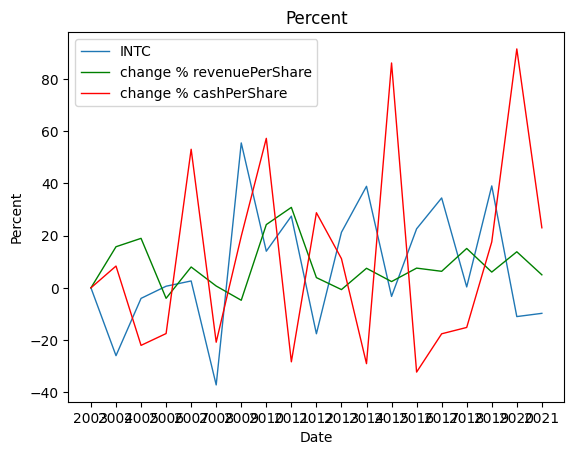

In [21]:

# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes_key[x],'g',lw=1, label=x)
plt.plot(df_with_changes_key[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

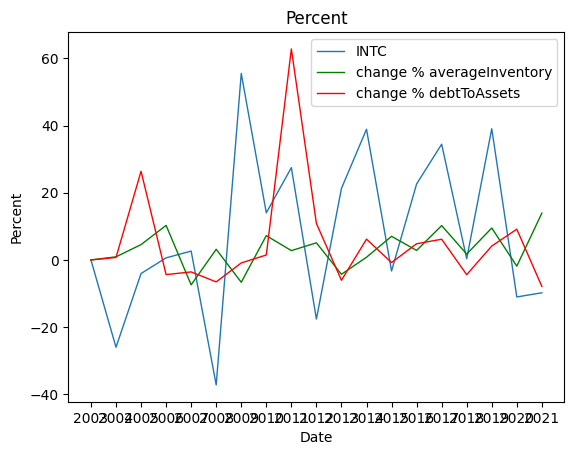

In [22]:


plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot close price and moving averages
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes_key[z],'g',lw=1, label=z)
plt.plot(df_with_changes_key[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

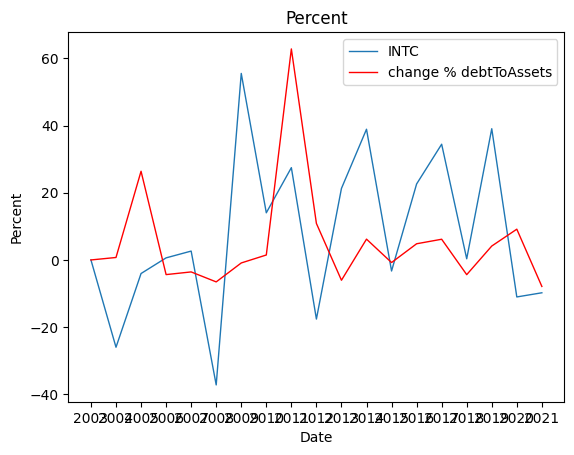

In [23]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot close price and moving averages
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
# plt.plot(df_with_changes_key[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes_key[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()

Vizualization income_statement

In [24]:
''' necessary columns '''

is0 = f'{ticker}'
is1 = f'change % {ticker}'
is2 = 'eps'
is3 = 'epsdiluted'
is4 = 'change % eps'
is5 = 'change % epsdiluted'
is6 = 'change % revenue'

In [25]:
# costOfRevenue
# eps
# epsdiluted
# ebitda
# grossProfit
# costOfRevenue
# revenue

In [26]:
df_with_changes_inc_stat = df_with_changes_inc_stat.reindex(index=df_with_changes_inc_stat.index[::-1])

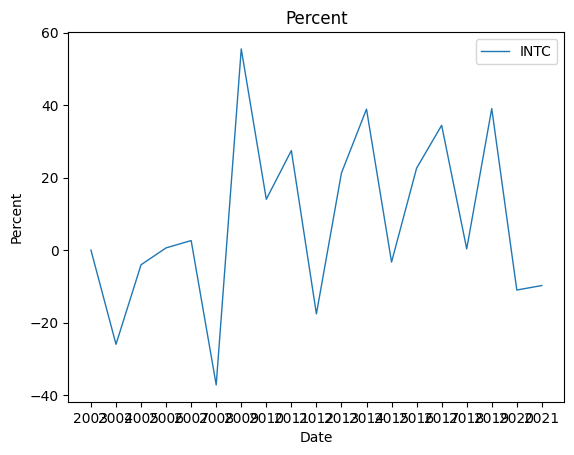

In [27]:


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
# plt.plot(df_with_changes_inc_stat[is0],lw=1, label=is0)
plt.plot(df_with_changes_inc_stat[is1],lw=1, label=ticker)
# plt.plot(df_with_changes_inc_stat[is2],'g',lw=1, label=is2)
# plt.plot(df_with_changes_inc_stat[is3],'r', lw=1, label=is3)

# Add a legend to the axis
plt.legend()

plt.show()

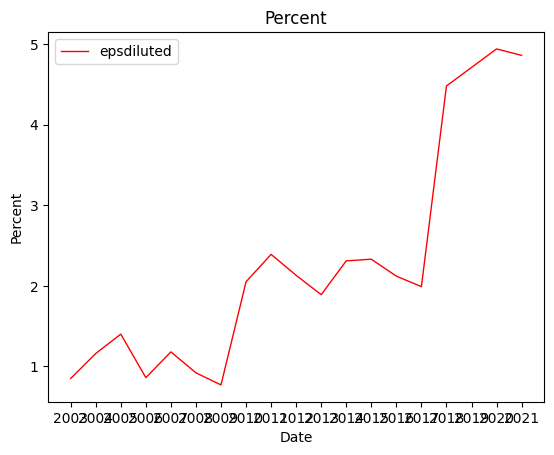

In [28]:


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot 
# plt.plot(df_with_changes_inc_stat[is0],lw=1, label=is0)
# plt.plot(df_with_changes_inc_stat[is1],lw=1, label=is1)
# plt.plot(df_with_changes_inc_stat[is2],'g',lw=1, label=is2)
plt.plot(df_with_changes_inc_stat[is3],'r', lw=1, label=is3)

# Add a legend to the axis
plt.legend()

plt.show()

math

In [29]:
df_with_changes_inc_stat[f'change % {ticker}'].sum()

148.05749226846285

In [30]:
df_with_changes_inc_stat['change % eps'].sum()

318.69563593948686